In [1]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'C:\Users\Li\PycharmProjects\动手深度学习\最大出力预测\Code\Code1030\冷端数据2017_2018.csv')

# 显示数据的前几行
print("数据前5行：")
print(df.head())

# 显示数据基本信息
print("\n数据基本信息：")
print(df.info())

数据前5行：
                  K_ts    凝汽器A背压    凝汽器B背压  凝汽器B#1入口循环水温度  凝汽器B#2入口循环水温度  \
0  2017-01-01 00:00:00  2.792825  2.582254       4.416206       4.621082   
1  2017-01-01 00:01:00  2.841498  2.566840       4.416206       4.619900   
2  2017-01-01 00:02:00  2.828064  2.660217       4.416206       4.618719   
3  2017-01-01 00:03:00  2.752542  2.535867       4.416206       4.617538   
4  2017-01-01 00:04:00  2.846542  2.611557       4.416206       4.616356   

   凝汽器A#1出口循环水温度  凝汽器A#2出口循环水温度        端差  
0      15.093410      14.994711  7.449918  
1      15.044846      14.957604  7.784002  
2      14.996281      14.920498  7.754191  
3      14.947717      14.883392  7.355998  
4      14.899153      14.846286  7.959041  

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035384 entries, 0 to 1035383
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   K_ts           1035384 non-null  object 
 1   凝汽器A背压  

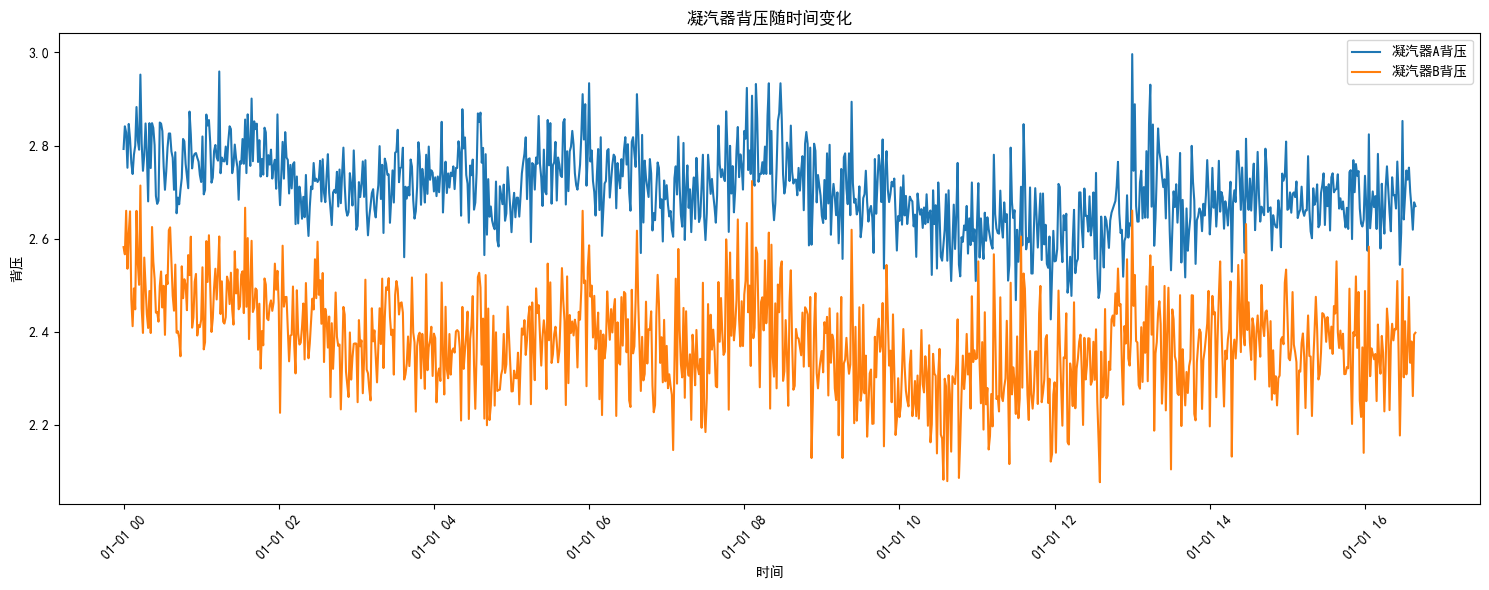

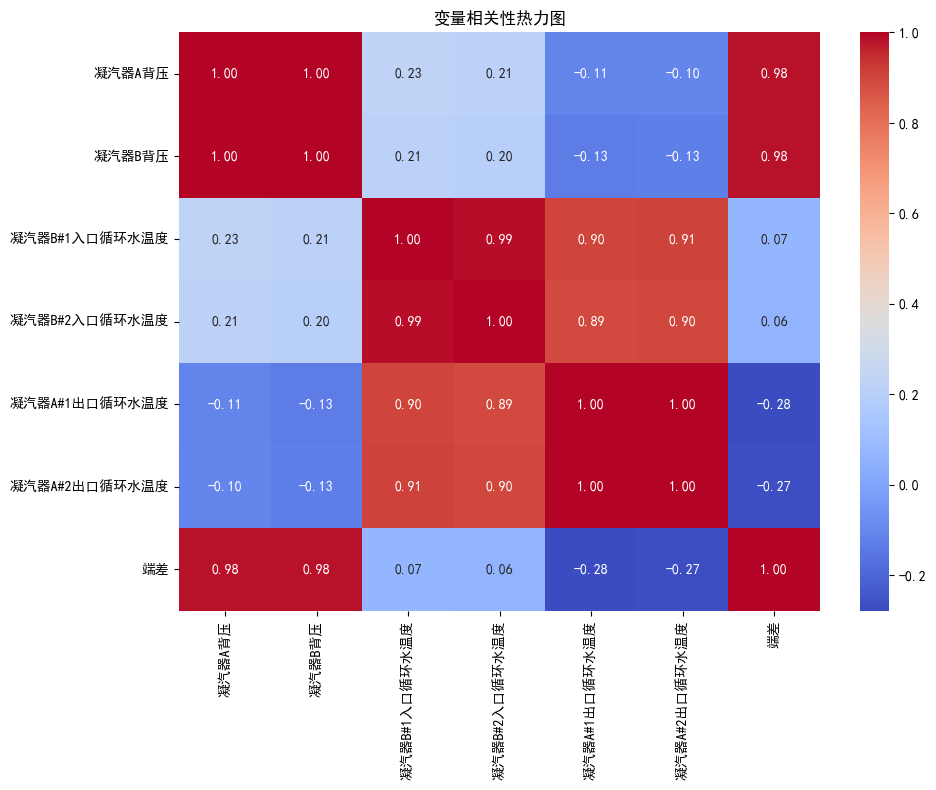

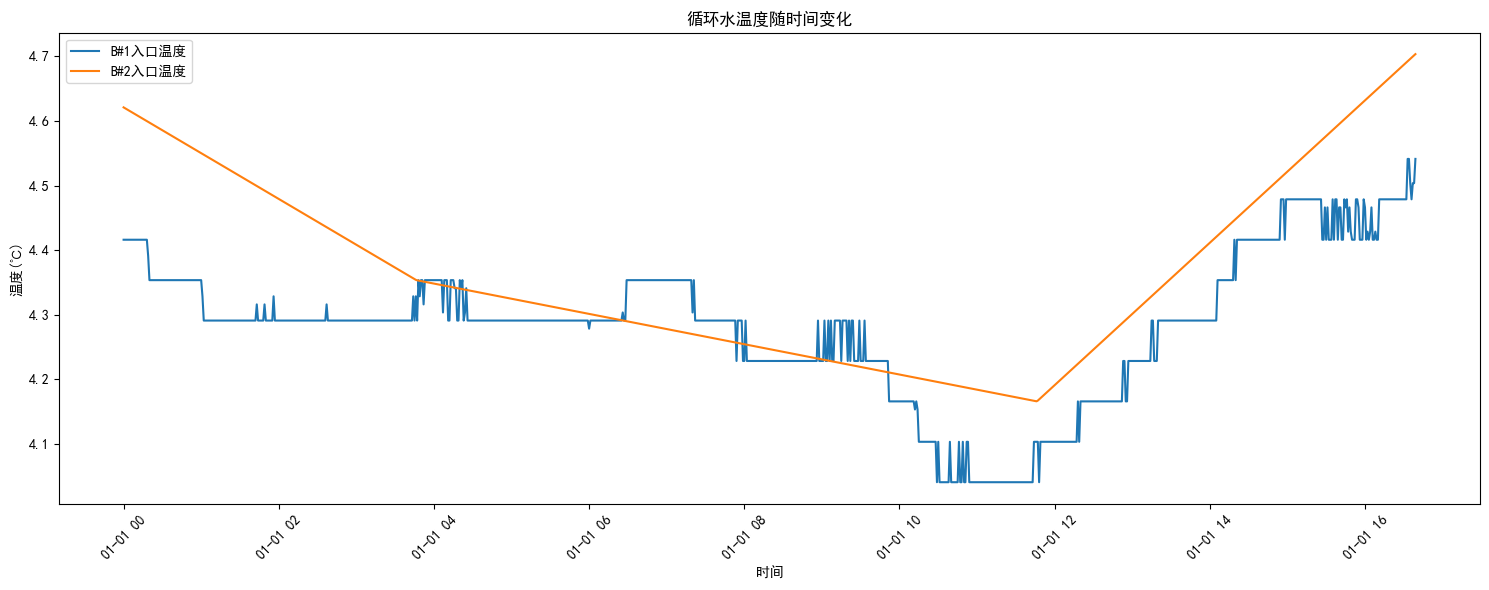

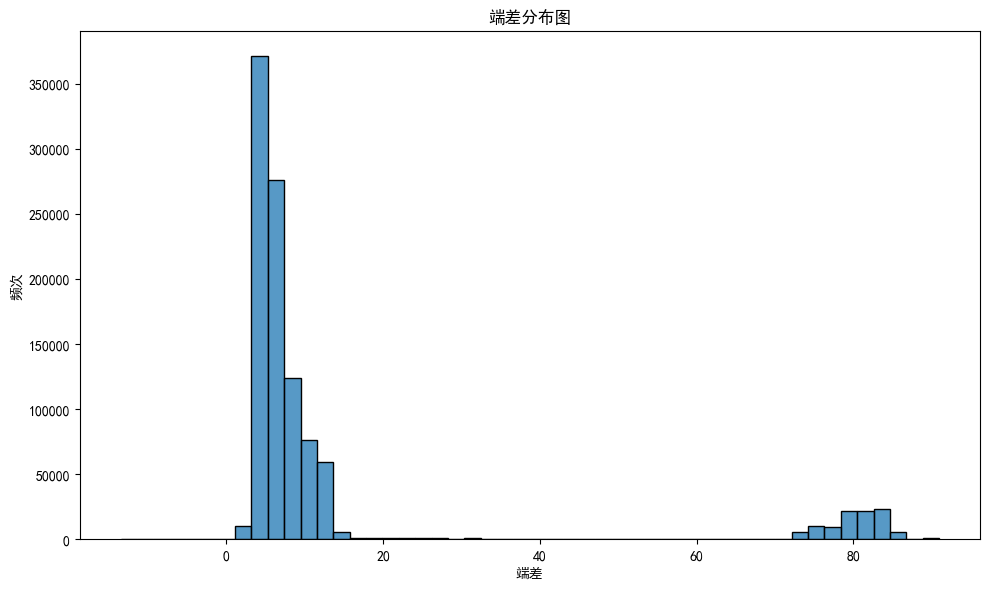

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 将时间列转换为datetime类型
df['K_ts'] = pd.to_datetime(df['K_ts'])

# 1. 时间序列图 - 背压变化
plt.figure(figsize=(15, 6))
plt.plot(df['K_ts'][:1000], df['凝汽器A背压'][:1000], label='凝汽器A背压')
plt.plot(df['K_ts'][:1000], df['凝汽器B背压'][:1000], label='凝汽器B背压')
plt.title('凝汽器背压随时间变化')
plt.xlabel('时间')
plt.ylabel('背压')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 相关性热力图
plt.figure(figsize=(10, 8))
correlation = df.drop('K_ts', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('变量相关性热力图')
plt.tight_layout()
plt.show()

# 3. 循环水温度对比图
plt.figure(figsize=(15, 6))
plt.plot(df['K_ts'][:1000], df['凝汽器B#1入口循环水温度'][:1000], label='B#1入口温度')
plt.plot(df['K_ts'][:1000], df['凝汽器B#2入口循环水温度'][:1000], label='B#2入口温度')
plt.title('循环水温度随时间变化')
plt.xlabel('时间')
plt.ylabel('温度(℃)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. 端差分布图
plt.figure(figsize=(10, 6))
sns.histplot(df['端差'], bins=50)
plt.title('端差分布图')
plt.xlabel('端差')
plt.ylabel('频次')
plt.tight_layout()
plt.show()

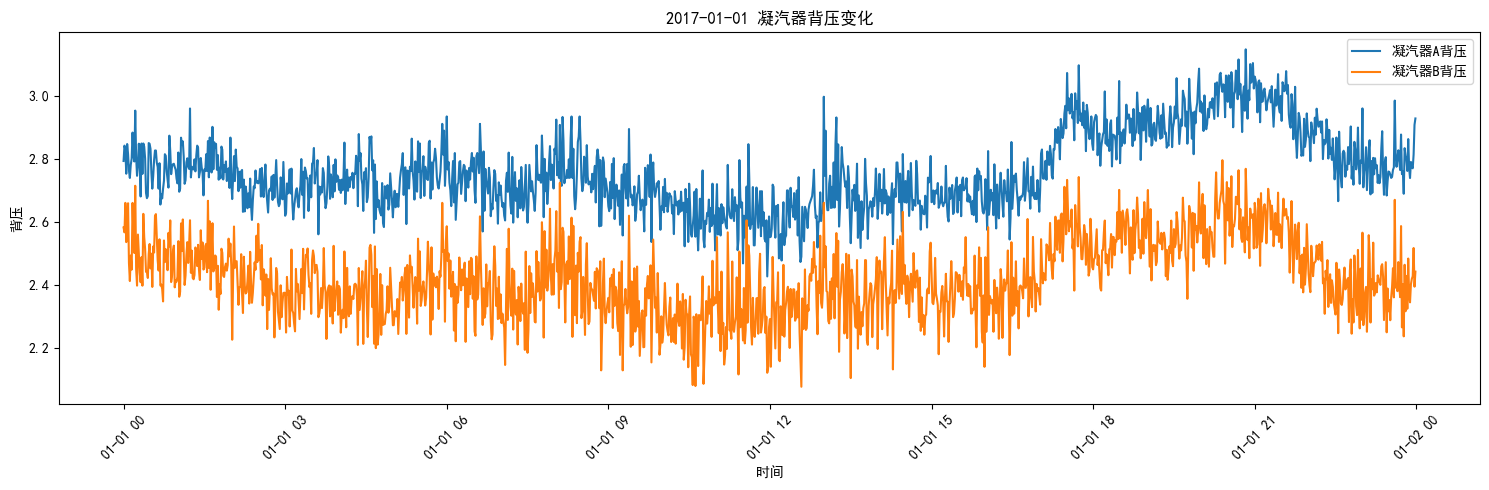

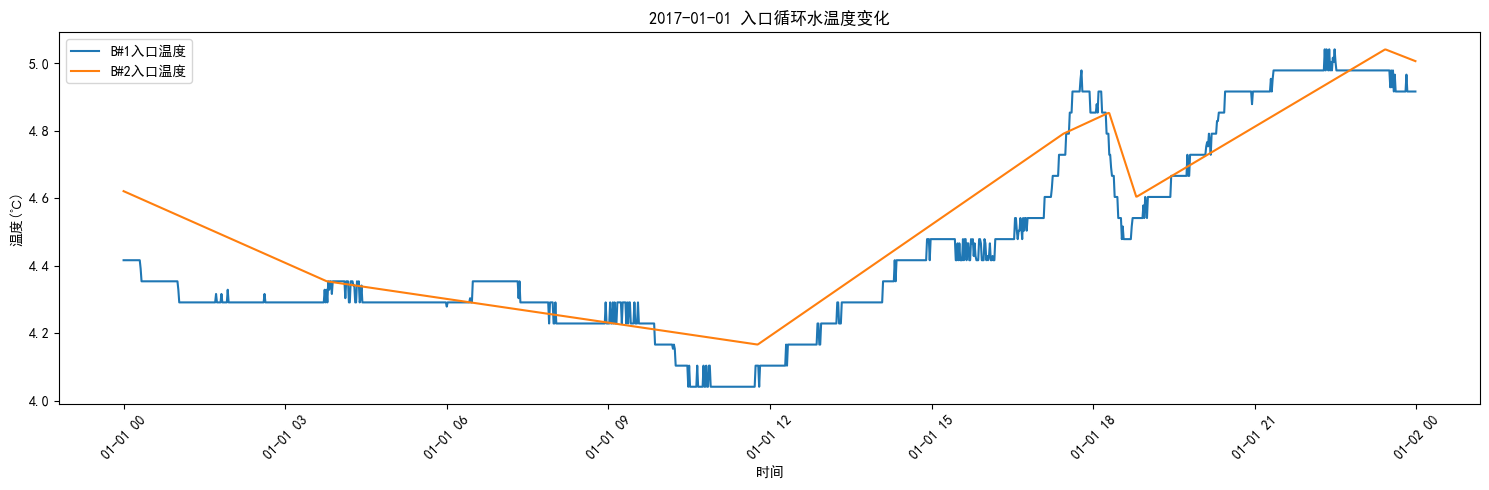

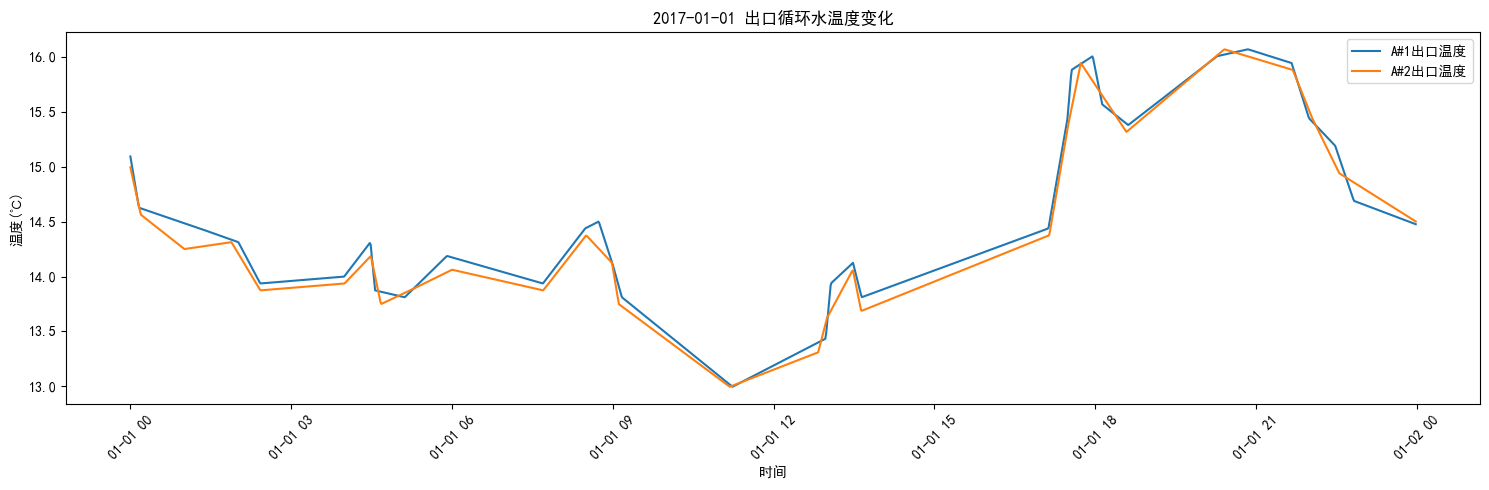

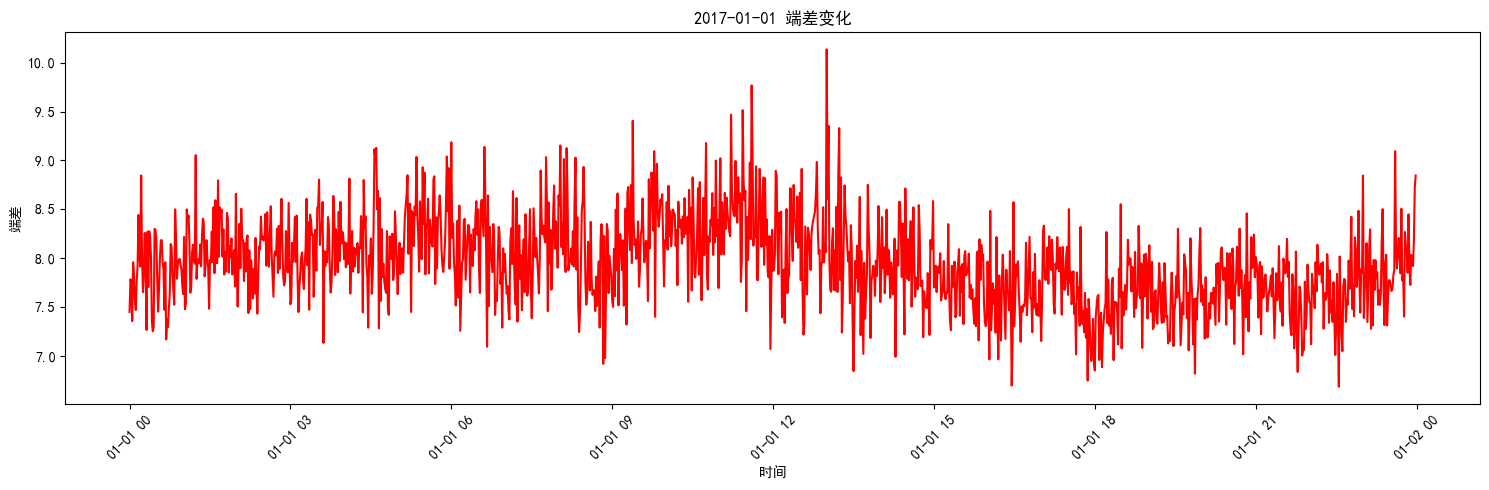

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 将时间列转换为datetime类型
df['K_ts'] = pd.to_datetime(df['K_ts'])

# 选择2017-01-01这一天的数据
one_day = df[df['K_ts'].dt.date == pd.to_datetime('2017-01-01').date()]

# 1. 背压变化图
plt.figure(figsize=(15, 5))
plt.plot(one_day['K_ts'], one_day['凝汽器A背压'], label='凝汽器A背压')
plt.plot(one_day['K_ts'], one_day['凝汽器B背压'], label='凝汽器B背压')
plt.title('2017-01-01 凝汽器背压变化')
plt.xlabel('时间')
plt.ylabel('背压')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 入口循环水温度变化图
plt.figure(figsize=(15, 5))
plt.plot(one_day['K_ts'], one_day['凝汽器B#1入口循环水温度'], label='B#1入口温度')
plt.plot(one_day['K_ts'], one_day['凝汽器B#2入口循环水温度'], label='B#2入口温度')
plt.title('2017-01-01 入口循环水温度变化')
plt.xlabel('时间')
plt.ylabel('温度(℃)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 出口循环水温度变化图
plt.figure(figsize=(15, 5))
plt.plot(one_day['K_ts'], one_day['凝汽器A#1出口循环水温度'], label='A#1出口温度')
plt.plot(one_day['K_ts'], one_day['凝汽器A#2出口循环水温度'], label='A#2出口温度')
plt.title('2017-01-01 出口循环水温度变化')
plt.xlabel('时间')
plt.ylabel('温度(℃)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. 端差变化图
plt.figure(figsize=(15, 5))
plt.plot(one_day['K_ts'], one_day['端差'], color='red')
plt.title('2017-01-01 端差变化')
plt.xlabel('时间')
plt.ylabel('端差')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()